# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import datetime
import time
import random
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

from api_keys import weather_api_key
from pprint import pprint


## Generate Cities List

In [2]:
from citipy import citipy
cities = []
while len(cities) < 643:
    x = (random.choice(range(-90,90)))
    y = (random.choice(range(-180,180)))
    city = citipy.nearest_city(x,y).city_name
    if city not in cities:
        cities.append(city)
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
weather_url = f"{url}&appid={weather_api_key}&units={unit}&q="


In [4]:
# Lists for results
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

count = 0
set = 1

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    try:
        response = requests.get(weather_url + city).json()
        city_name.append(city)
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        if count > 48:
            count = 1
            set += 1
        else:
            count += 1
        print("Processing Record %s of Set %s | %s" %(count, set, city))
    except:
        print("City not found: Skipping...")
        city_name.pop()
        pass
        
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | urucara
Processing Record 5 of Set 1 | bosconia
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ushuaia
City not found: Skipping...
City not found: Skipping...
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | los llanos de aridane
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | srednekolymsk
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | la ronge
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | singapore
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | mehamn
Processing Record 21 of Set 1 | comodoro rivadavia
Processing Rec

Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | itoman
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | morehead
Processing Record 45 of Set 4 | sal rei
City not found: Skipping...
Processing Record 46 of Set 4 | saint-joseph
Processing Record 47 of Set 4 | almaznyy
Processing Record 48 of Set 4 | kargopol
Processing Record 49 of Set 4 | plainview
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | ahuimanu
Processing Record 3 of Set 5 | qaqortoq
Processing Record 4 of Set 5 | novopokrovka
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | jalu
City not found: Skipping...
Processing Record 7 of Set 5 | mantua
Processing Record 8 of Set 5 | kemin
Processing Record 9 of Set 5 | bathsheba
Processing Record 10 of Set 5 | maragogi
Processing Record 11 of Set 5 | namatanai
Processing Record 12 of Set 5 | duku
Processing Record 13 of Set 5 | libreville
Pr

Processing Record 30 of Set 8 | viedma
Processing Record 31 of Set 8 | capoterra
Processing Record 32 of Set 8 | saint-georges
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | mau
Processing Record 35 of Set 8 | si bun ruang
Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | hofn
Processing Record 39 of Set 8 | synya
City not found: Skipping...
Processing Record 40 of Set 8 | iskateley
Processing Record 41 of Set 8 | chara
Processing Record 42 of Set 8 | avera
Processing Record 43 of Set 8 | san cristobal
Processing Record 44 of Set 8 | neuchatel
Processing Record 45 of Set 8 | fairbanks
Processing Record 46 of Set 8 | kahului
Processing Record 47 of Set 8 | shizunai
Processing Record 48 of Set 8 | acayucan
Processing Record 49 of Set 8 | tuban
Processing Record 1 of Set 9 | zhuhai
Processing Record 2 of Set 9 | pemangkat
Processing Record 3 of Set 9 | moron
City not found: Skipping...
Proce

Processing Record 25 of Set 12 | half moon bay
Processing Record 26 of Set 12 | mahina
Processing Record 27 of Set 12 | bilma
Processing Record 28 of Set 12 | mathbaria
Processing Record 29 of Set 12 | san juan
Processing Record 30 of Set 12 | tashtyp
Processing Record 31 of Set 12 | manavalakurichi
Processing Record 32 of Set 12 | kajaani
Processing Record 33 of Set 12 | dudinka
Processing Record 34 of Set 12 | hit
Processing Record 35 of Set 12 | kropachevo
Processing Record 36 of Set 12 | charters towers
Processing Record 37 of Set 12 | kuchera
Processing Record 38 of Set 12 | ketchikan
Processing Record 39 of Set 12 | yuksekova
Processing Record 40 of Set 12 | kirkwood
Processing Record 41 of Set 12 | rio grande
City not found: Skipping...
Processing Record 42 of Set 12 | saint-leu
Processing Record 43 of Set 12 | egvekinot
Processing Record 44 of Set 12 | kizilskoye
Processing Record 45 of Set 12 | sao joao da barra
Processing Record 46 of Set 12 | migori
Processing Record 47 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather = {"City": city_name,
                "Latitude": lat,
                "Longitude" : lon,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
               "Date" : date}


In [6]:
city_df = pd.DataFrame(city_weather)
city_df.to_csv("..\Resources\WeatherData.csv",encoding="utf-8",index=False)
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,74.16,76,2,6.62,PF,1658289087
1,avarua,-21.2078,-159.7750,75.25,69,40,6.91,CK,1658289087
2,victoria,22.2855,114.1577,91.96,70,100,11.99,HK,1658289022
3,urucara,-2.5364,-57.7600,74.10,91,88,2.89,BR,1658289088
4,bosconia,9.9689,-73.8836,78.31,80,76,2.46,CO,1658289088


In [7]:
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,18.696828,22.475233,69.399608,71.979557,54.127768,8.155980,1.658289e+09
std,33.033657,88.665466,14.079472,19.688866,39.620586,5.716527,8.619781e+01
min,-54.800000,-179.166700,32.270000,12.000000,0.000000,0.000000,1.658289e+09
25%,-8.442950,-53.288150,59.000000,60.000000,9.500000,3.900000,1.658289e+09
50%,20.931000,29.069800,70.390000,76.000000,64.000000,6.910000,1.658289e+09
75%,47.819000,100.335400,80.650000,88.000000,96.500000,11.010000,1.658289e+09
max,78.218600,179.316700,107.600000,100.000000,100.000000,54.090000,1.658289e+09


In [8]:
city_df.count()

City          587
Latitude      587
Longitude     587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = city_df[(city_df["Humidity"] > 100)]
humidity_over_100


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
humidity_over_100.index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = pd.concat([city_df,humidity_over_100], axis=0,ignore_index=True).drop_duplicates(keep=False,ignore_index=True)
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,74.16,76,2,6.62,PF,1658289087
1,avarua,-21.2078,-159.7750,75.25,69,40,6.91,CK,1658289087
2,victoria,22.2855,114.1577,91.96,70,100,11.99,HK,1658289022
3,urucara,-2.5364,-57.7600,74.10,91,88,2.89,BR,1658289088
4,bosconia,9.9689,-73.8836,78.31,80,76,2.46,CO,1658289088
...,...,...,...,...,...,...,...,...,...
582,kizilskoye,52.7255,58.8937,66.25,67,95,12.01,RU,1658289272
583,sao joao da barra,-21.6403,-41.0511,69.67,92,40,8.10,BR,1658289171
584,migori,-1.0634,34.4731,56.80,78,65,7.05,KE,1658289272
585,nizhniy chir,48.3597,43.0865,68.32,46,1,5.77,RU,1658289272


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

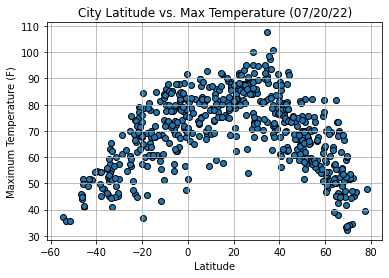

In [12]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Max Temp"],edgecolor="black",marker="o", label ="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid(True)
plt.savefig("Images/Temperature.png")

The Latitude vs Temperature plot shown above includes data from all the cities attains its maximum around 20-degress latitude. The latitude values below and above that latitude shows a linear relationship too. 

## Latitude vs. Humidity Plot

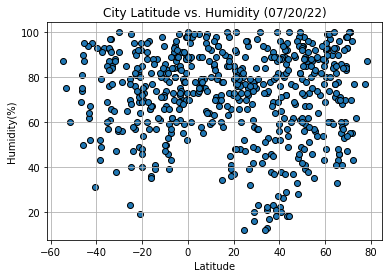

In [13]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity"],edgecolor="black",marker="o", label ="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig("Images/Humidity.png")

The Latitude Vs. Humidity plot shows that that the distribution of data points are relatively spread out. There is more clustering as the Humidity % crosses 40.

## Latitude vs. Cloudiness Plot

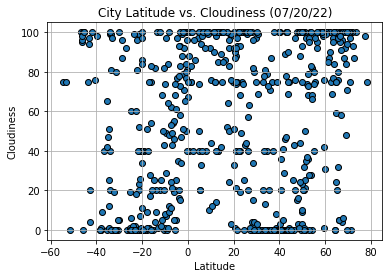

In [14]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness"],edgecolor="black",marker="o", label ="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("Images/Cloudiness.png")

The Latitude Vs. Cloudiness plot doesn't seem to show a relationship between the Latitude and Cloudiness. There is a lot of clusters in 0 and between 90 to 100. It is possible that these may be categorised from some sources but doesn't suggest continuous measurement.

## Latitude vs. Wind Speed Plot

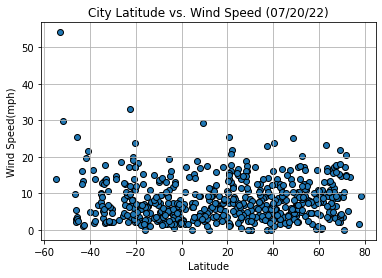

In [15]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed"],edgecolor="black",marker="o", label ="Cities")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)
plt.savefig("Images/Wind_Speed.png")

The Latitude Vs Wind Speed Plot doesn't show any relation between the latitude and wind speed but we can conlude that majority of the values and below 15mph.

## Linear Regression

In [16]:
def linear_regression(x_value,y_value,locx,locy,y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    
    regress = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value,regress,"r-")
    plt.annotate(line_eq,(locx,locy), fontsize =12, color ="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()
    print(f"The r-value is:{rvalue}")
    

In [17]:
northern_df = clean_city_data.loc[clean_city_data["Latitude"] > 0]
southern_df = clean_city_data.loc[clean_city_data["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:-0.6584573950520403


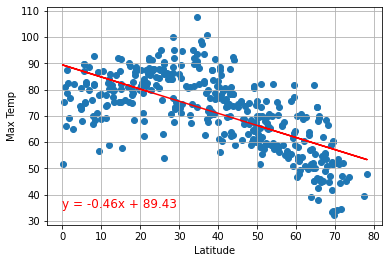

In [18]:
x_value = northern_df["Latitude"]
y_value = northern_df["Max Temp"]

locx = 0
locy = 35

y_label = "Max Temp"
linear_regression(x_value,y_value,locx,locy,y_label)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.7348075844325834


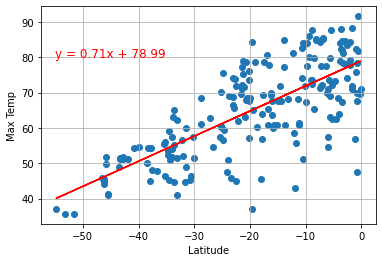

In [19]:
x_value = southern_df["Latitude"]
y_value = southern_df["Max Temp"]

locx = -55
locy = 80

y_label = "Max Temp"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:-0.017277372843748917


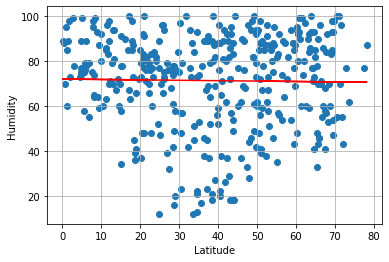

In [20]:
x_value = northern_df["Latitude"]
y_value = northern_df["Humidity"]

locx = 50
locy = 5

y_label = "Humidity"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.048422401751102045


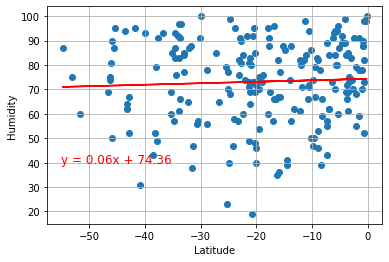

In [21]:
x_value = southern_df["Latitude"]
y_value = southern_df["Humidity"]

locx = -55
locy = 40

y_label = "Humidity"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.01575089117971124


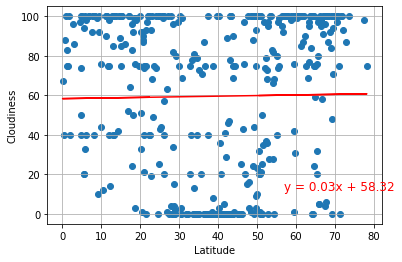

In [22]:
x_value = northern_df["Latitude"]
y_value = northern_df["Cloudiness"]

locx = 57
locy = 12

y_label = "Cloudiness"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.05414698573788755


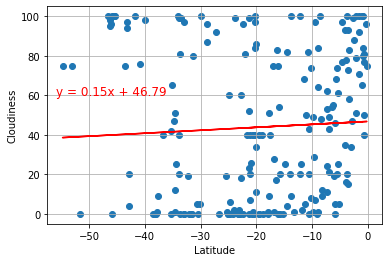

In [23]:
x_value = southern_df["Latitude"]
y_value = southern_df["Cloudiness"]

locx = -56
locy = 60

y_label = "Cloudiness"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.10233488110572116


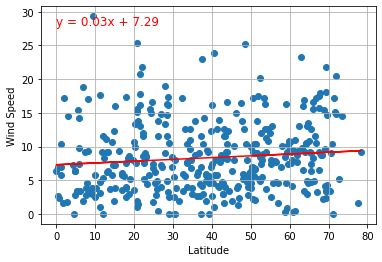

In [24]:
x_value = northern_df["Latitude"]
y_value = northern_df["Wind Speed"]

locx = 0
locy = 28

y_label = "Wind Speed"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.2944731993854543


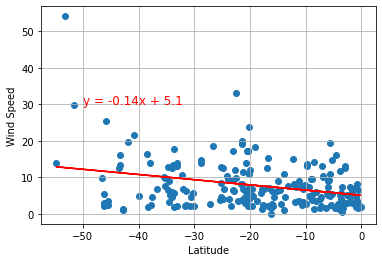

In [25]:
x_value = southern_df["Latitude"]
y_value = southern_df["Wind Speed"]

locx = -50
locy = 30

y_label = "Wind Speed"
linear_regression(x_value,y_value,locx,locy,y_label)